# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_current_price = requests.get(btc_url)

# Fetch current ETH price
eth_current_price = requests.get(eth_url)

# Print the response to check if its working
print(btc_current_price)
print(eth_current_price)

<Response [200]>
<Response [200]>


In [6]:
# Convert the output or format the data to JSON 
btc = btc_current_price.json()
eth = eth_current_price.json()

In [7]:
# Using json.dumps we will format data with the argument indent=4 and print the output 
import json

print(json.dumps(btc, indent=4))
print(json.dumps(eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18824456,
            "total_supply": 18824456,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 44943.0,
                    "volume_24h": 33167758770,
                    "market_cap": 846908782227,
                    "percentage_change_1h": -0.195542977262035,
                    "percentage_change_24h": 3.6311379557329,
                    "percentage_change_7d": -6.13235304828246,
                    "percent_change_1h": -0.195542977262035,
                    "percent_change_24h": 3.6311379557329,
                    "percent_change_7d": -6.13235304828246
                },
                "CAD": {
                    "price": 57405.6939,
                    "volume_24h": 42365178276.921,
                    "m

In [8]:
# Select the price of each crypto currency
btc_price = btc['data']['1']['quotes']['CAD']['price']
eth_price = eth['data']['1027']['quotes']['CAD']['price']

print(f"The current btc_price is ${btc_price}")
print(f"The current eth_price is ${eth_price}")

The current btc_price is $57405.6939
The current eth_price is $4021.783418


In [9]:
# Compute current value of my crypto
my_btc_value = (my_btc) * (btc_price)
my_eth_value = (my_eth) * (eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68886.83
The current value of your 5.3 ETH is $21315.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [12]:
# We wiLl verify that Alpaca key and secret were correctly loaded
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [13]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2020-05-01", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head(5)

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.13  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.75  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.78  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.13  287.70   68883538

In [15]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

AGG     SPY
2020-05-01  116.900  282.73
2020-05-04  116.975  283.66
2020-05-05  116.880  286.22
2020-05-06  116.450  284.29
2020-05-07  116.730  287.70
2020-05-08  116.440  292.47
2020-05-11  116.100  292.56
2020-05-12  116.420  286.62
2020-05-13  116.600  281.67
2020-05-14  116.940  285.05

In [16]:
# Print AGG and SPY close prices
agg_close_price = df_closing_prices.iloc[0]["AGG"]
spy_close_price = df_closing_prices.iloc[0]["SPY"]

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.9
Current SPY closing price: $282.73


In [17]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14136.50
The current value of your 200 AGG shares is $23380.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value+my_eth_value
shares = my_agg_value+my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame([crypto, shares], columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

amount
crypto  90202.284795
shares  37516.500000

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

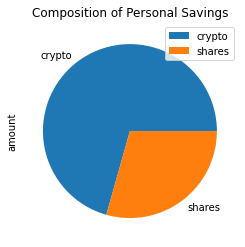

In [19]:
# Plot savings pie chart
df_savings.plot.pie(title='Composition of Personal Savings', y='amount')

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached your financial goal.")
else:
    print(f"You are {(emergency_fund-total_savings)} from reaching your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-22', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

df_stock_data.dropna(inplace=True)

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-03 00:00:00-04:00  252.46  252.89  252.23  252.85  33875099.0  
2017-10-04 00:00:00-04:00  252.69  253.44  252.56  253.16  30217246.0  
2017-10-05 00:00:00-04:00  253.51  254.68  253.40  254.64  45350955.0  
2017-10-06 00:00:00-04:00  254.15  254.46  253.85  254.40  40706912.0  
2017-10-09 00:00:00-04:00  254.63  254.70  253.65  253.96  23554888.0

In [23]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN  252.46  252.89  252.23  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00  33875099.0          NaN  
2017-10-04 00:00:00-04:00  30217246.0     0.001226  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sadia\Desktop\API-FP-HW5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2          3          4          5    \
0      1.000000  1.000000  1.000000   1.000000   1.000000   1.000000   
1      1.008509  0.995504  1.002074   0.984992   1.002371   1.006970   
2      1.010375  0.992029  1.006162   0.995549   1.000881   1.005803   
3      0.998157  1.002620  1.008837   0.993220   1.021333   1.002780   
4      0.991341  1.010492  1.008954   0.995181   1.008810   1.001245   
...         ...       ...       ...        ...        ...        ...   
7556  17.149657  5.597851  7.381877  14.839971  12.688144  23.706418   
7557  16.973062  5.592964  7.424338  15.014223  12.794507  23.908167   
7558  17.026221  5.610363  7.326423  14.907739  12.839211  23.580073   
7559  16.865502  5.578883  7.435711  14.996553  12.834659  23.579204   
7560  16.726216  5.616945  7.389902  14.868795  12.910087  23.362265   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      0.999407   0.997287   1.004092   1.015203  ...   1.012825   1.000462   
2      0.998053   0.999296   1.002882   1.015142  ...   1.021617   1.008054   
3      0.997812   1.002604   1.001389   1.030186  ...   1.029279   1.005477   
4      1.000458   0.996073   1.012840   1.022378  ...   1.029529   1.001665   
...         ...        ...        ...        ...  ...        ...        ...   
7556  36.857188  40.806132  13.776247  13.371039  ...  18.659663  26.433140   
7557  36.422560  40.865520  13.767228  13.412526  ...  18.731777  26.282661   
7558  36.197131  41.136103  13.881660  13.539068  ...  18.697740  26.243631   
7559  35.814390  40.938859  13.974616  13.469850  ...  18.549413  26.016093   
7560  35.727778  40.962976  14.145949  13.470158  ...  18.269332  25.577897   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.999721   1.005243   1.004161   1.016724   1.010160   0.999704   
2      0.983849   1.003155   0.999187   1.016038   0.994624   0.986479   
3      0.979102   1.004421   0.983939   1.021865   0.998465   0.987507   
4      0.979418   1.013089   0.988932   1.012279   0.982876   0.981852   
...         ...        ...        ...        ...        ...        ...   
7556  52.697827  10.160735  49.918586  15.194157  97.163942  14.027034   
7557  53.364401  10.256817  49.440012  15.037190  97.980695  14.404066   
7558  53.711208  10.317929  49.246858  15.182681  98.709616  14.362761   
7559  53.592778  10.224349  48.537065  15.393190  97.883839  14.429811   
7560  53.043615  10.282013  48.524404  15.488375  97.168929  14.106302   

           498       499  
0     1.000000  1.000000  
1     0.997602  0.995085  
2     1.000816  0.998724  
3     0.999199  1.009602  
4     0.999390  1.002425  
...        ...       ...  
7556  6.244859  8.210867  
7557  6.212546  8.068763  
7558  6.252376  8.063161  
7559  6.280510  8.027096  
7560  6.272470  8.138574  

[7561 rows x 500 columns]

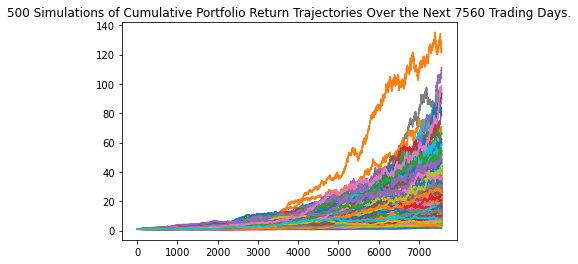

In [27]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")

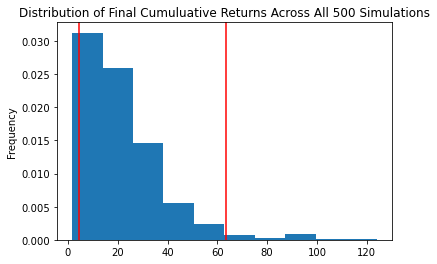

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.009783
std              16.542147
min               1.693169
25%              10.552710
50%              17.748817
75%              28.295193
max             123.874022
95% CI Lower      4.358716
95% CI Upper     63.535911
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87174.33 and $1270718.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*(20000*1.5),2)
ci_upper = round(tbl[9]*(20000*1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130761.49 and $1906077.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

# Set number of simulations
num_sims = 500

MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

df_stock_data.dropna(inplace=True)

# Printing the simulation input data
MC_five_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN  252.46  252.89  252.23  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00  33875099.0          NaN  
2017-10-04 00:00:00-04:00  30217246.0     0.001226  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sadia\Desktop\API-FP-HW5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999060  1.003855  1.011971  0.993898  0.992859  0.986481  0.995019   
2     1.009934  1.012482  1.007005  0.989897  0.978994  0.987601  0.990266   
3     1.023643  1.012353  0.993350  0.979458  0.977349  0.983791  0.979660   
4     1.024884  1.015981  0.986288  0.978226  0.971404  0.982778  0.978470   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.673619  1.318087  1.662550  1.487922  2.866127  1.270365  1.365300   
1257  1.670301  1.317271  1.689231  1.462970  2.899402  1.283798  1.363016   
1258  1.655291  1.306652  1.698178  1.461651  2.919470  1.276458  1.379187   
1259  1.687066  1.298274  1.685152  1.462178  2.935840  1.278304  1.375643   
1260  1.678438  1.300261  1.690080  1.459475  2.904048  1.280699  1.372365   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.994883  1.012082  1.004589  ...  1.000424  1.008110  0.986152   
2     1.007009  1.007098  1.017675  ...  0.999620  1.014306  0.975406   
3     0.995455  1.022674  1.025825  ...  1.019660  1.030053  0.972512   
4     0.979824  1.015229  1.034834  ...  1.018375  1.023663  0.974854   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.098278  2.362728  1.134395  ...  1.389060  2.260793  1.884994   
1257  1.092755  2.384036  1.138256  ...  1.394128  2.255906  1.883640   
1258  1.087509  2.368695  1.130471  ...  1.390868  2.263505  1.871162   
1259  1.103449  2.379599  1.122595  ...  1.391383  2.243997  1.856950   
1260  1.102785  2.367882  1.127424  ...  1.399188  2.267755  1.835896   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.998627  0.989530  1.008899  0.994354  1.010146  1.008265  0.993829  
2     0.987183  0.990437  1.010519  0.988128  1.006112  1.008520  0.989150  
3     0.972664  0.979901  1.017501  0.986139  1.010497  0.997654  0.993730  
4     0.974252  0.981039  1.020080  1.004922  1.020608  0.998548  1.006729  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.402603  2.898539  1.362368  1.707895  1.532014  2.051178  1.497983  
1257  1.408536  2.891237  1.367932  1.712363  1.519194  2.036708  1.515961  
1258  1.423203  2.901821  1.385406  1.718495  1.529940  2.012950  1.509336  
1259  1.408157  2.898170  1.391122  1.693802  1.534824  2.012208  1.508904  
1260  1.424692  2.909400  1.395939  1.691228  1.531880  2.024396  1.525419  

[1261 rows x 500 columns]

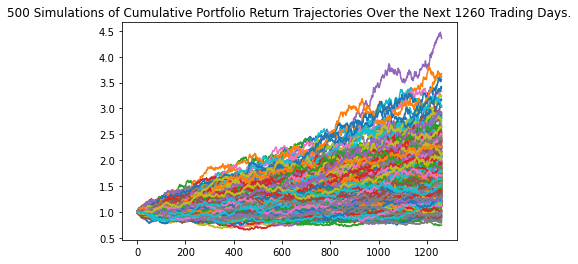

In [34]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

# Save the plot for future usage
line_plot_five.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches="tight")

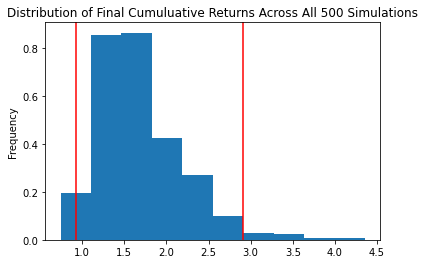

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

# Save the plot for future usage
dist_plot_five.get_figure().savefig('MC_five_year_dist_plot.png',bbox_inches='tight')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.683020
std               0.512601
min               0.743839
25%               1.328367
50%               1.590270
75%               1.919082
max               4.355714
95% CI Lower      0.932332
95% CI Upper      2.906858
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round((tbl_five)[8]*60000,2)
ci_upper_five = round((tbl_five)[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55939.9 and $174411.48


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

# Set number of simulations
num_sims = 500

MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
df_stock_data.dropna(inplace=True)

# Printing the simulation input data
MC_ten_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN  252.46  252.89  252.23  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00  33875099.0          NaN  
2017-10-04 00:00:00-04:00  30217246.0     0.001226  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sadia\Desktop\API-FP-HW5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.007319  1.005173  0.993441  1.005666  1.010268  1.000419  0.981600   
2     0.987145  1.002185  1.003560  0.995987  1.015180  1.001014  0.980773   
3     0.991447  1.002324  1.015704  0.990721  1.014097  0.996573  0.998579   
4     0.989589  0.989437  1.018215  0.979038  1.019675  0.979671  1.001022   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.737672  2.724112  2.808178  2.133723  2.106383  2.415328  3.286664   
2517  1.710006  2.686984  2.811217  2.134050  2.126976  2.393175  3.295643   
2518  1.714744  2.728203  2.813401  2.131042  2.097471  2.404128  3.342541   
2519  1.713909  2.733297  2.818531  2.144075  2.104765  2.394396  3.396313   
2520  1.713162  2.745024  2.835298  2.142406  2.116570  2.389767  3.395315   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003574  1.002665  0.997410  ...  1.002374  1.004590  1.000817   
2     1.005843  1.018102  0.987700  ...  1.009014  1.024867  1.001357   
3     0.997063  1.016210  0.986565  ...  1.022849  1.018165  1.014583   
4     1.001397  1.027251  0.988025  ...  1.018464  1.029473  1.017133   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.320721  1.433062  2.470649  ...  5.963059  2.300954  5.146709   
2517  1.318067  1.403662  2.447340  ...  6.013068  2.346754  5.136293   
2518  1.298972  1.428334  2.466708  ...  5.998825  2.388292  5.135406   
2519  1.303092  1.431884  2.468466  ...  5.991507  2.341078  5.107647   
2520  1.298153  1.430397  2.451079  ...  6.000411  2.322947  5.096884   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.010984  1.006734  0.995914  0.998258  0.995784  1.010720  0.998543  
2     1.016123  1.015513  0.990165  1.002521  1.001430  1.007877  1.005142  
3     1.024174  1.019417  0.980436  1.011194  1.005837  1.016791  1.017376  
4     1.015200  1.017769  0.979913  1.017546  1.001244  1.006130  1.026801  
...        ...       ...       ...       ...       ...       ...       ...  
2516  3.287157  3.937115  3.386788  2.326265  2.970551  4.747907  2.661123  
2517  3.281300  3.941109  3.352727  2.338925  3.004464  4.685358  2.654185  
2518  3.239510  3.898246  3.363367  2.330359  3.008467  4.669068  2.677114  
2519  3.232254  3.893069  3.341196  2.310622  2.999846  4.682881  2.692661  
2520  3.269640  3.886708  3.343762  2.314991  2.936801  4.737299  2.727352  

[2521 rows x 500 columns]

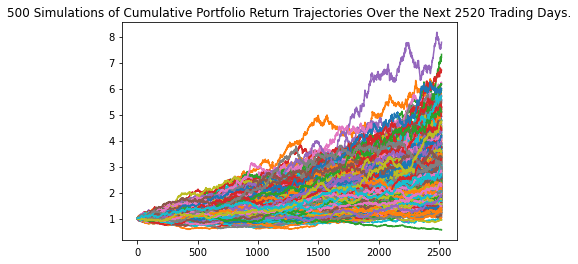

In [40]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

# Save the plot for future usage
line_plot_ten.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches="tight")

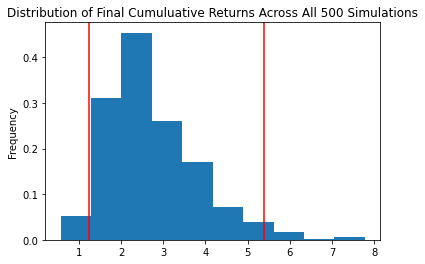

In [41]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

# Save the plot for future usage
dist_plot_ten.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.730259
std               1.083960
min               0.561545
25%               1.973788
50%               2.534795
75%               3.355729
max               7.782113
95% CI Lower      1.228144
95% CI Upper      5.389517
Name: 2520, dtype: float64


In [43]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round((tbl_ten)[8]*60000,2)
ci_upper_ten = round((tbl_ten)[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73688.65 and $323371.03
